In [3]:
import random as rnd
import matplotlib.pyplot as plt
from collections import Counter

In [11]:
def condorcet(number_of_jurors):
    # Recommended number of trials
    n_outcomes = 10000 
    
    # Create a list to append jury accuracies to 
    accuracy_ratios = [] 
    
    # For each value in the arbitrary number of intervals (that being 41 because it gives us a solid range of accuracies in increments of 0.025):
    # - Create a jury with a certain level of accuracy
    # - Create a list of outcomes based on n_outcomes
    # - Run the rest of the program to determine a final ratio of correct answers. 
    for i in range(1, 41):
        accuracy = i/41
        jury = [accuracy for _ in range(number_of_jurors)]
        outcomes = [rnd.choice([0,1]) for _ in range(n_outcomes)]

        # Create a list to append the verdicts to, then go through each outcome and compare it to the (random) judgements of the jurors
        verdicts = []
        for out in outcomes:
            verdict = []
            for juror in jury:
                if rnd.random() < juror:
                    verdict.append(out)
                else:
                    verdict.append(1-out)
            verdicts.append(Counter(verdict).most_common(1)[0][0])

        # Figure out a final sum for how many verdicts were correct
        correct = 0
        for i in range(len(outcomes)):
            if outcomes[i] == verdicts[i]:
                correct += 1

        # Add our ratio of correct answers to number of outcomes to the list of ratios
        accuracy_ratios.append(correct / len(outcomes))
    
    return accuracy_ratios

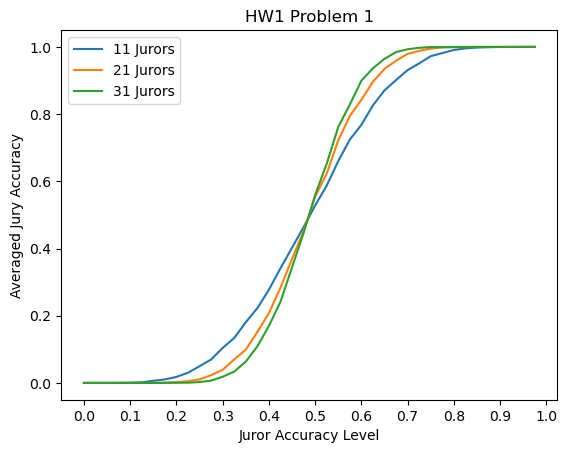

In [10]:
# Set X value, run the simulation three times
x = range(1, 41)
y1 = condorcet(11)
y2 = condorcet(21)
y3 = condorcet(31)

# Plot the curves
plt.plot(x, y1, label='11 Jurors')
plt.plot(x, y2, label='21 Jurors')
plt.plot(x, y3, label='31 Jurors')

# Pretty graph makes for some good dopamine
plt.xlabel('Juror Accuracy Level')
plt.ylabel('Averaged Jury Accuracy')
plt.title('HW1 Problem 1')
plt.legend()

plt.xticks(range(1, 45, 4), [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.show()